# `ClimateTools.jl` and `ClimatePlots.jl`

[ClimateTools.jl](https://juliaclimate.github.io/ClimateTools.jl/dev/) is a collection of commonly-used tools aimed to ease the typical steps in (1) analyzing climate models outputs from netCDF files that follow CF-conventions and (2) creating climate scenarios. [ClimatePlots.jl](https://juliaclimate.github.io/ClimatePlots.jl/dev/) is the associated plotting library.

_Note: `tas_day_MIROC5_piControl_*.nc` was downloaded [here](http://esgf-data1.diasjp.net/thredds/fileServer/esg_dataroot/cmip5/output1/MIROC/MIROC5/piControl/day/atmos/day/r1i1p1/v20161012/tas/tas_day_MIROC5_piControl_r1i1p1_20000101-20091231.nc) by selecting `piControl,day,tas,MIROC5` in [the search engine](https://esgf-node.llnl.gov/search/cmip5/)_

```
project=CMIP5, model=MIROC5, Atmosphere and Ocean Research Institute (The University of Tokyo), 
experiment=pre-industrial control, time_frequency=day, modeling realm=atmos, ensemble=r1i1p1,
Description: MIROC5 model output prepared for CMIP5 pre-industrial control 
```

In [1]:
#]add ClimateTools#master; add ClimatePlots#master

## Inspect A Data Set File Via NCDataSets

Uncomment the final line to display the file meta data.

In [2]:
using ClimateTools, ClimatePlots
p=joinpath(dirname(pathof(ClimateTools)),"../test/data")

fil="$p/tas_day_MIROC5_piControl_r1i1p1_20000101-20091231.nc"
#fil="$p/clt_day_MIROC5_historical_r4i1p1_19500101-19591231.nc"
d=Dataset(fil);

## Extract Subset And Plot Region

See : `ClimatePlots.jl/src/maps_definition.jl`

Note : not `mapclimgrid(C1, region = "Quebec")` as in docs

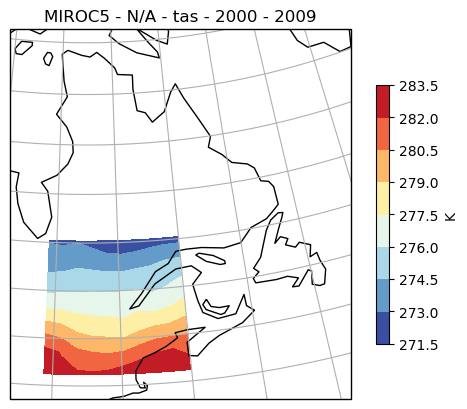

In [3]:
poly_reg = [[NaN -65 -80 -80 -65 -65];[NaN 42 42 52 52 42]]
C1 = load(fil, "tas", poly=poly_reg)
contourf(C1, region = "Quebec");

## Read & Plot Another Variable

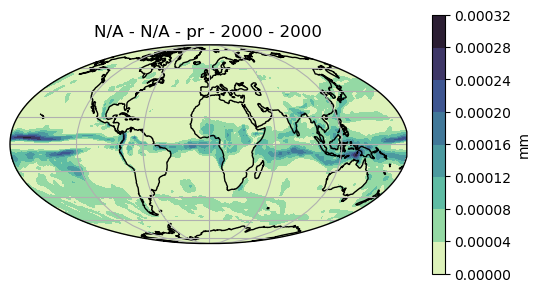

In [4]:
#fil="$p/orog_fx_GFDL-ESM2G_historicalMisc_r0i0p0.nc"
fil="$p/sresa1b_ncar_ccsm3-example.nc"
C2 = load(fil, "pr", data_units="mm")
contourf(C2, region = "Mollweide");

## Inspect Meta Data In Each Variable

In [5]:
#C1
C2

ClimGrid struct with data:
   3-dimensional AxisArray{Float32,3,...} with axes:
    :lon, Float32[-180.0, -178.59375, -177.1875, -175.78125, -174.375, -172.96875, -171.5625, -170.15625, -168.75, -167.34375  …  165.9375, 167.34375, 168.75, 170.15625, 171.5625, 172.96875, 174.375, 175.78125, 177.1875, 178.59375]
    :lat, Float32[-88.927734, -87.538704, -86.14147, -84.742386, -83.3426, -81.94247, -80.542145, -79.14171, -77.741196, -76.34063  …  76.34063, 77.741196, 79.14171, 80.542145, 81.94247, 83.3426, 84.742386, 86.14147, 87.538704, 88.927734]
    :time, DateTimeNoLeap[DateTimeNoLeap(2000-05-16T12:00:00)]
And data, a 256×128×1 Array{Float32,3}
Project: IPCC Fourth Assessment
Institute: N/A
Model: N/A
Experiment: 720 ppm stabilization experiment (SRESA1B)
Run: N/A
Variable: pr
Data units: mm
Frequency: N/A
Global attributes: Dict{String,Any} with 18 entries
Filename: /Users/gforget/mywork/codes/julia-notebooks-etc/ClimateTools.jl/src/../test/data/sresa1b_ncar_ccsm3-example.nc